In [1]:
import pandas as pd
from scipy import sparse # cargar matrices dispersas
from sklearn import model_selection #division de datos
from sklearn.naive_bayes import MultinomialNB #cargamos el modelo NB
# Importar el módulo de métricas de scikit-learn para el cálculo de precisión
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [2]:
#metodo para importar datos x, y
def importarDatos (nombre_vector_tfidf, etiquetas): #carga datos para entrenamiento y prueba
    a = np.load("3.Extraccion_caracteristicas/"+nombre_vector_tfidf)
    b = np.load("3.Extraccion_caracteristicas/"+etiquetas)
    X = a['arr_0']
    y = b['arr_0']
    return X, y

In [3]:
import matplotlib.pyplot as plt
#metodo para graficar datos de entrenamiento y prueba
def graficarDivisionDatos(X_train, X_test):
    col_map = plt.get_cmap('tab10') # color barras
    values = [len(X_train), len(X_test)] 
    labels = ['Entrenamiento', 'Prueba'] 
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
        return my_autopct
    plt.rcParams["figure.facecolor"] = "w"
    plt.pie(values,
           labels=labels,
           colors=col_map.colors,
           textprops={'color':"black",'fontweight':'heavy'},
           shadow=True,
           explode=[0,0.1],
           autopct=make_autopct(values))
    plt.title("Division del dataset en datos\n" + "entrenamiento y prueba", bbox={'facecolor':'0.8', 'pad':5})
    plt.show()

In [4]:
#Metodo para graficar la matriz de confusion
from sklearn.metrics import ConfusionMatrixDisplay

def graficar_MatrizConfusion(y_test, predictions):
    cf_matrix=confusion_matrix(y_test,predictions)
    labels=['No depresivo','Depresivo']#modelo_SVM.classes_   1--depresivo
    cm_display = ConfusionMatrixDisplay(cf_matrix, display_labels=labels)
    #print(modelo_SVM.classes_)
    dp=cm_display.plot(cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.rcParams["figure.facecolor"] = "w"
    dp.ax_.set_title('Matriz de Confusion', fontsize=13)
    plt.show()

In [5]:
#Metodo para calcular la validacion cruzada
def validacion_cruzada(modelo_SVM, X_train, y_train):
    scoring = 'accuracy'
    seed=7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True) ##shuffle para activar el random state
    cv_results = model_selection.cross_val_score(modelo_SVM, X_train, y_train, cv=kfold, scoring=scoring)
    #results.append(cv_results)
    #names.append(name)
    print("Iteraciones validacion cruzada:\n",cv_results)
    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
    print("Precision media:\n",msg)

# División de datos en conjuntos de prueba y entrenamiento con Unigramas

### División de datos de entrenamiento y prueba

In [6]:
#Cargamos los datos
x_U, y_U = importarDatos("x_tfidf_Unigrama.npz","y_tfidf_Unigrama.npz")
#separamos los datos en los conjuntos de entrenamiento prueba
seed = 7
X_train_U, X_test_U, y_train_U, y_test_U = model_selection.train_test_split(x_U, y_U, test_size=0.2, random_state=seed) # 80% training y 20% test

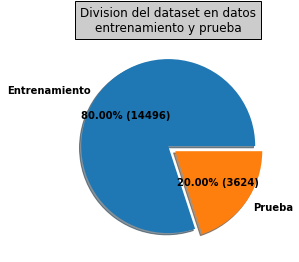

In [8]:
#graficamos la division de datos de entrenamiento y prueba
graficarDivisionDatos(X_train_U, X_test_U)

### Entrenamiento del modelo

In [9]:
# Crear el modelo de Naive Bayes
modelo_NB_unigrama = MultinomialNB()
#Entrena el modelo usando los conjuntos de entrenamiento.
modelo_NB_unigrama.fit(X_train_U, y_train_U)

MultinomialNB()

### Evaluación del rendimiento del modelo con Validación Cruzada

In [10]:
#calculamos la validacion cruzada con los datos de entrenamiento 
validacion_cruzada(modelo_NB_unigrama, X_train_U, y_train_U)

Iteraciones validacion cruzada:
 [0.89310345 0.87478441 0.89582615 0.88030355 0.8851328 ]
Precision media:
 0.885830 (0.007821)


### Evaluación del modelo con métricas de evaluacion.

In [11]:
# Predecir la respuesta para el conjunto de datos de prueba
predictions_U = modelo_NB_unigrama.predict(X_test_U)
# Precisión del modelo.
print("Exactitud (Accuracy):", accuracy_score(y_test_U, predictions_U))
print(classification_report(y_test_U,predictions_U))

Exactitud (Accuracy): 0.8959713024282561
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1779
           1       0.85      0.96      0.90      1845

    accuracy                           0.90      3624
   macro avg       0.90      0.89      0.90      3624
weighted avg       0.90      0.90      0.90      3624



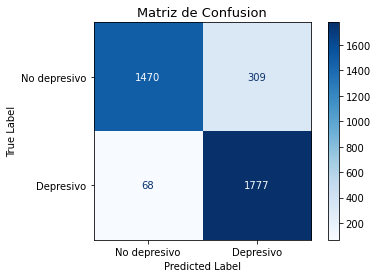

In [12]:
#Graficamos la matriz de confusion para visualizar el desempeño del algoritmo
graficar_MatrizConfusion(y_test_U, predictions_U)

# División de datos en conjuntos de prueba y entrenamiento con Bigramas

### División de datos de entrenamiento y prueba

In [16]:
#Cargamos los datos
x_B, y_B = importarDatos("x_tfidf_Bigrama.npz", "y_tfidf_Bigrama.npz")
#separamos los datos en los conjuntos de entrenamiento prueba
seed = 7
X_train_B, X_test_B, y_train_B, y_test_B = model_selection.train_test_split(x_B, y_B, test_size=0.2, random_state=seed) # 80% training y 20% test

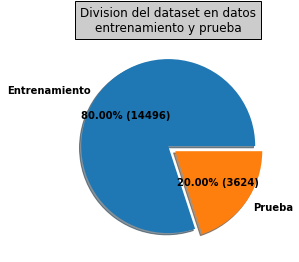

In [17]:
#graficamos la division de datos de entrenamiento y prueba
graficarDivisionDatos(X_train_B, X_test_B)

### Entrenamiento del modelo

In [18]:
# Crear el modelo de Naive Bayes
modelo_NB_bigrama =  MultinomialNB()
#Entrena el modelo usando los conjuntos de entrenamiento.
modelo_NB_bigrama.fit(X_train_B, y_train_B)

MultinomialNB()

### Evaluación del rendimiento del modelo con Validación Cruzada

In [19]:
#calculamos la validacion cruzada con los datos de entrenamiento 
validacion_cruzada(modelo_NB_bigrama, X_train_B, y_train_B)

Iteraciones validacion cruzada:
 [0.82       0.81407382 0.82373232 0.82511211 0.82718179]
Precision media:
 0.822020 (0.004612)


### Evaluación del modelo con métricas de evaluacion.

In [20]:
# Predecir la respuesta para el conjunto de datos de prueba
predictions_B = modelo_NB_bigrama.predict(X_test_B)
# Precisión del modelo.
print("Exactitud (Accuracy):", accuracy_score(y_test_B, predictions_B))
print(classification_report(y_test_B,predictions_B))

Exactitud (Accuracy): 0.8465783664459161
              precision    recall  f1-score   support

           0       0.88      0.79      0.84      1779
           1       0.82      0.90      0.86      1845

    accuracy                           0.85      3624
   macro avg       0.85      0.85      0.85      3624
weighted avg       0.85      0.85      0.85      3624



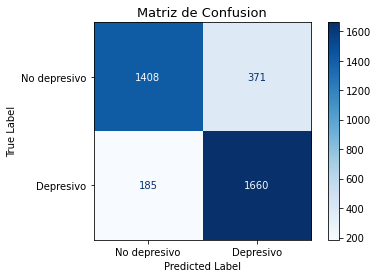

In [21]:
#Graficamos la matriz de confusion para visualizar el desempeño del algoritmo
graficar_MatrizConfusion(y_test_B, predictions_B)

# División de datos en conjuntos de prueba y entrenamiento con Trigramas

In [22]:
#Cargamos los datos
x_T, y_T = importarDatos("x_tfidf_Trigrama.npz","y_tfidf_Trigrama.npz")
#separamos los datos en los conjuntos de entrenamiento y prueba
seed = 7
X_train_T, X_test_T, y_train_T, y_test_T = model_selection.train_test_split(x_T, y_T, test_size=0.2, random_state=seed) # 80% training y 20% test

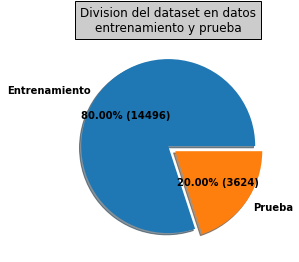

In [23]:
#graficamos la division de datos de entrenamiento y prueba
graficarDivisionDatos(X_train_T, X_test_T)

### Entrenamiento del modelo

In [24]:
# Crear el modelo de Naive Bayes
modelo_NB_trigrama =  MultinomialNB()
#Entrena el modelo usando los conjuntos de entrenamiento.
modelo_NB_trigrama.fit(X_train_T, y_train_T)

MultinomialNB()

### Evaluación del rendimiento del modelo con Validación Cruzada

In [25]:
#calculamos la validacion cruzada con los datos de entrenamiento 
validacion_cruzada(modelo_NB_trigrama, X_train_T, y_train_T)

Iteraciones validacion cruzada:
 [0.67137931 0.6664367  0.66367713 0.65746809 0.67506037]
Precision media:
 0.666804 (0.006102)


### Evaluación del modelo con métricas de evaluacion.

In [26]:
# Predecir la respuesta para el conjunto de datos de prueba
predictions_T = modelo_NB_trigrama.predict(X_test_T)
# Precisión del modelo.
print("Exactitud (Accuracy):", accuracy_score(y_test_T, predictions_T))
print(classification_report(y_test_T,predictions_T))

Exactitud (Accuracy): 0.6619757174392936
              precision    recall  f1-score   support

           0       0.60      0.94      0.73      1779
           1       0.87      0.40      0.54      1845

    accuracy                           0.66      3624
   macro avg       0.73      0.67      0.64      3624
weighted avg       0.74      0.66      0.64      3624



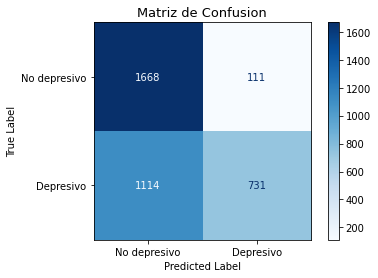

In [27]:
#Graficamos la matriz de confusion para visualizar el desempeño del algoritmo
graficar_MatrizConfusion(y_test_T, predictions_T)

### Comparación del rendimiento de los modelos

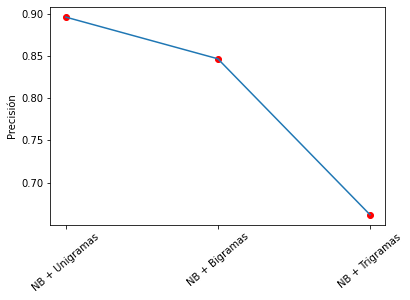

In [28]:
#Comparamos los 3 modelos NB con N-gramas
precisionModelos =[]
precisionModelos.append(accuracy_score(y_test_U, predictions_U))
precisionModelos.append(accuracy_score(y_test_B, predictions_B))
precisionModelos.append(accuracy_score(y_test_T, predictions_T))

#Graficamos
plt.rcParams["figure.facecolor"] = "w"
plt.scatter(range(1, 4), precisionModelos, color='red')
plt.plot(range(1, 4), precisionModelos)
plt.xticks([1, 2, 3], ['NB + Unigramas', 'NB + Bigramas', 'NB + Trigramas'], rotation=40)
plt.ylabel('Precisión')
plt.show()

Guardamos el mejor modelo

In [29]:
#Exportamos el modelo de NB con unigramas dado que es el que brinda una mejor precisión
import joblib 
joblib.dump(modelo_NB_unigrama, 'modelo_NB_Unigram.pkl') # Guarda el modelo.

['modelo_NB_Unigram.pkl']